# Universe Evolution from the Friedmann equations

# Friedmann Equations

The equations are
$$ \left( \frac{\dot a}{a} \right)^2 = \frac{8 \pi G}{3} \rho - \frac{kc^2}{a^2}$$  
$$ \dot\rho_i =  -3\frac{\dot a}{a}\left(\rho_i+\frac{P_i}{c^2}\right) $$ 
This can be rewritten using  $$ p(t) = p_0 \left( \frac{a}{a_0} \right) ^{-3(1+w)}$$
using the ratio $$ \Omega=\frac{\rho}{\rho_c}= \rho \frac{8 \pi G}{3H^2} $$ 
and
$$\Omega-1=\frac{kc^2}{H^2a^2}=\Omega_k$$
If $\Omega_k$ is not zero, his value fixes $a_0$ and $k$. But in the following process we can set $a_0=1$ to find $\frac{a(t)}{a_0}$
$$ \left( \frac{\dot a}{a} \right)^2 = H_0^2 (\Omega_ma^{-3} + \Omega_r a^{-4} + \Omega_\Lambda- \Omega_k a^{-2}) $$  


# Universe class
This class contains the parameters of the universe to be simulated. The evolution is decided by the present Hubble parameter $H_0$ and the energy density ratio $\Omega_i$ in respect to the critical energy density $\rho_c$

In [336]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

G = 6.6743e-11 #G in SI
c =  299792458 #G in SI
H0 = 2.27e-18 #Hubble constant in Si units
Mpc = 3.085677581e22 #Mpc in Meters

In [337]:

critical_density = lambda H : 3*H**2/(8*np.pi*G)  #Get the critical density for a flat universe, using the present Hubble value
second2Gyear = lambda t: t/(3600*24*365.25*1e9)   #Seconds to Gigayears conversion
Gyear2second = lambda t: t*(3600*24*365.25*1e9)   #Gigayears to secondsconversion
Hubble2SI = lambda H : H*1e3/Mpc  #Hubble constant from km/(s*Mpc) to SI units

In [338]:
Omega0 = {'m': 1.0, 'r':0.0, 'L': 0.0}

In [339]:
class universe:
  Omega = []
  Omega0 = {}
  H0_notSI = 0
  H0 = 0
  k = 0
  def __init__(self,H0, Omega0):
    self.Omega0 = Omega0
    self.H0_notSI = H0
    self.H0 = Hubble2SI(H0)
    print()
    Omega0['k'] = Omega0['m']+Omega0['r']+Omega0['L']-1
    self.k = 0 if Omega0['k']==0 else 1 if Omega0['k']>0 else -1
    print(self)
    
  def __str__(self):  #String associated to the class that will be printed when calling print(universe)
    curvature = 'flat' if self.k==0 else 'open' if self.k==-1 else 'close'
    s = f'Universe with a present Hubble parameter of {self.H0_notSI} km/(s Mpc).\n\
    The critical energy density is {critical_density(self.H0)}, the present one has components {self.Omega0}.\n\
    The universe is {curvature} (k = {self.k}).'
    return s

  def f(self, t, a, H0, Omega0):
    return a*H0*(Omega0['m']*a**(-3) + Omega0['r']*a**(-4) + Omega0['L'] - Omega0['k']*a**(-2))**0.5

  def eventAttr():  #decorartor needed to set terminal=True
    def decorator(func):
        func.terminal = True
        return func
    return decorator

  @eventAttr()  
  def singularity(self, t, a, H0, Omega0): return a #Stop the evolution if a singularity (a=0) is found

  def evolution(self, t_past, t_future):
    t_lims = [Gyear2second(t_past), Gyear2second(t_future)]
    Y_past = solve_ivp(self.f, (0, t_lims[0]), y0=[1.0], method='RK45', t_eval=np.linspace(0, t_lims[0], 1000), events = self.singularity, args=(self.H0, self.Omega0))
    print('Done past evolution')
    Y_future = solve_ivp(self.f, (0, t_lims[1]), y0=[1.0], method='RK45', t_eval=np.linspace(0, t_lims[1], 1000), events = self.singularity, args=(self.H0, self.Omega0))
    print('Done future evolution')
    T = np.append(np.flip(Y_past.t), Y_future.t)
    a = np.append(np.flip(Y_past.y[0]), Y_future.y[0])
    return second2Gyear(np.array(T)), np.array(a)

  


Universe with a present Hubble parameter of 70 km/(s Mpc).
    The critical energy density is 9.203873925903795e-27, the present one has components {'m': 1.5, 'r': 0.0, 'L': 0.0, 'k': 0.5}.
    The universe is close (k = 1).
Done past evolution
Done future evolution


/tmp/ipykernel_12193/3171262862.py:24: RuntimeWarning: invalid value encountered in sqrt
  return a*H0*(Omega0['m']*a**(-3) + Omega0['r']*a**(-4) + Omega0['L'] - Omega0['k']*a**(-2))**0.5


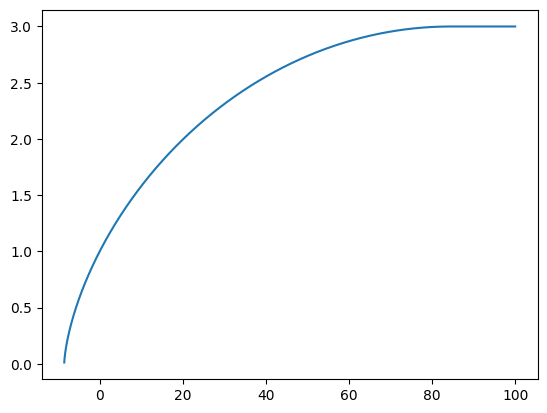

In [340]:
u = universe(70, {'m':1.5, 'r':0.0, 'L': 0.00})
T, a = u.evolution(-10, 100)

plt.plot(T,a)